In [1]:
import pandas as pd
import numpy as np
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full.shape, X_train_full.ndim

((60000, 28, 28), 3)

In [3]:
X_test.shape

(10000, 28, 28)

In [4]:
y_train_full

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [5]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [6]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [7]:
X_valid, X_train = X_train_full[:5000]/255, X_train_full[5000:]/255
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [8]:
X_test = X_test/255

In [9]:
X_valid

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [10]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00392157,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.17254902, 0.49803922, 0.71372549, 0.7254902 ,
        0.63137255, 0.47058824, 0.21568627, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.16470588,
        0.77647059, 0.98431373, 1.        , 0.98431373, 0.97647059,
        0.96862745, 1.    

In [11]:
model = keras.models.Sequential()   #empty network created.
#model.add(keras.layers.InputLayer(shape=[28, 28]))   #added the input layer which is supposed to receive the instance of 28x28 shape of numpy array
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation='relu')) #added the hidden layer which must have 300 neurons with relu activation function.
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

C:\Apps\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [14]:
#model.compile(loss=keras.losses.sparse_categorical_crossentropy, optimizer=keras.optimizers.SGD(), metrics=[keras.metrics.sparse_categorical_accuracy])
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=['accuracy'])

In [15]:
#ANN will be trained with 55k images, 30 epochs
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6880 - loss: 0.9762 - val_accuracy: 0.8186 - val_loss: 0.5260
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8214 - loss: 0.5071 - val_accuracy: 0.8454 - val_loss: 0.4541
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8446 - loss: 0.4455 - val_accuracy: 0.8542 - val_loss: 0.4264
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8513 - loss: 0.4222 - val_accuracy: 0.8318 - val_loss: 0.4594
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8610 - loss: 0.3968 - val_accuracy: 0.8722 - val_loss: 0.3855
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8667 - loss: 0.3788 - val_accuracy: 0.8700 - val_loss: 0.3674
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8677 - loss: 0.3723 - val_accuracy: 0.8752 - val_loss: 0.3657
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8772 - loss: 0.

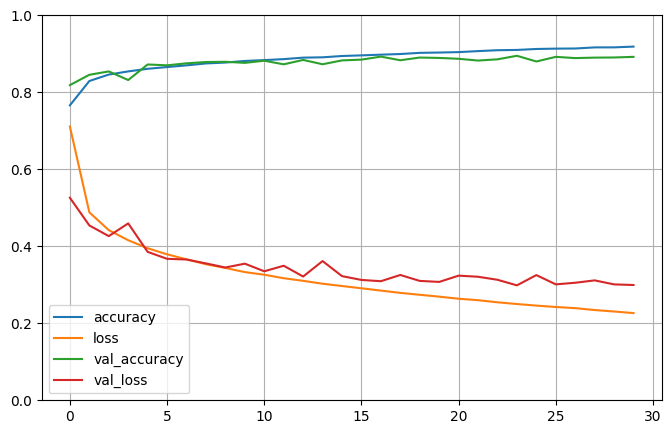

In [16]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [17]:
history = model.fit(X_train, y_train, epochs=25, validation_data=(X_valid, y_valid))

Epoch 1/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9228 - loss: 0.2184 - val_accuracy: 0.8900 - val_loss: 0.3061
Epoch 2/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9209 - loss: 0.2212 - val_accuracy: 0.8892 - val_loss: 0.3049
Epoch 3/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9256 - loss: 0.2108 - val_accuracy: 0.8944 - val_loss: 0.2979
Epoch 4/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9271 - loss: 0.2066 - val_accuracy: 0.8954 - val_loss: 0.2902
Epoch 5/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9277 - loss: 0.2036 - val_accuracy: 0.8946 - val_loss: 0.2960
Epoch 6/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9281 - loss: 0.2022 - val_accuracy: 0.8966 - val_loss: 0.2914
Epoch 7/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9306 - loss: 0.1966 - val_accuracy: 0.8954 - val_loss: 0.2980
Epoch 8/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9287 - loss: 0.1969

In [18]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8918 - loss: 0.3443


[0.33786243200302124, 0.88919997215271]

In [19]:
X_new = X_test[:3]   #take the first 3 instances from the testing set and using them for prediction
y_pred = model.predict(X_new)
y_pred.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [20]:
model.save(r'C:\Temp\my_keras_model.h5')   #h5 - HDF5 format.

In [21]:
rec_model = keras.models.load_model(r'C:\Temp\my_keras_model.h5')
rec_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,612 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [22]:
model = keras.models.Sequential()   #empty network created.
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation='relu')) #added the hidden layer which must have 300 neurons with relu activation function.
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

C:\Apps\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [23]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=['accuracy'])

In [27]:
checkpoint_cb = keras.callbacks.ModelCheckpoint(r'C:\Temp\ANN\save_keras_model.h5')   #ModelCheckpoint callback is already available in keras callbacks package - used for saving the model
history = model.fit(X_train, y_train, epochs=15, validation_data=(X_valid, y_valid), callbacks=[checkpoint_cb])

Epoch 1/15
1712/1719 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6731 - loss: 1.0258

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.6735 - loss: 1.0244 - val_accuracy: 0.8360 - val_loss: 0.5025
Epoch 2/15
1709/1719 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8231 - loss: 0.5061

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8231 - loss: 0.5060 - val_accuracy: 0.8280 - val_loss: 0.4860
Epoch 3/15
1710/1719 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8441 - loss: 0.4445

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8441 - loss: 0.4444 - val_accuracy: 0.8568 - val_loss: 0.4279
Epoch 4/15
1710/1719 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8534 - loss: 0.4189

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8534 - loss: 0.4189 - val_accuracy: 0.8606 - val_loss: 0.4047
Epoch 5/15
1717/1719 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8579 - loss: 0.4025

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8579 - loss: 0.4025 - val_accuracy: 0.8692 - val_loss: 0.3759
Epoch 6/15
1710/1719 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8651 - loss: 0.3811

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8651 - loss: 0.3811 - val_accuracy: 0.8640 - val_loss: 0.3836
Epoch 7/15
1701/1719 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8700 - loss: 0.3603

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8700 - loss: 0.3603 - val_accuracy: 0.8756 - val_loss: 0.3645
Epoch 8/15
1714/1719 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8726 - loss: 0.3625

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8726 - loss: 0.3625 - val_accuracy: 0.8638 - val_loss: 0.3776
Epoch 9/15
1714/1719 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8772 - loss: 0.3439

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8772 - loss: 0.3439 - val_accuracy: 0.8742 - val_loss: 0.3525
Epoch 10/15
1717/1719 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8785 - loss: 0.3371

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8785 - loss: 0.3371 - val_accuracy: 0.8696 - val_loss: 0.3564
Epoch 11/15
1715/1719 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8848 - loss: 0.3202

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8848 - loss: 0.3202 - val_accuracy: 0.8844 - val_loss: 0.3360
Epoch 12/15
1706/1719 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8858 - loss: 0.3185

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8858 - loss: 0.3185 - val_accuracy: 0.8810 - val_loss: 0.3288
Epoch 13/15
1713/1719 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8877 - loss: 0.3127

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8877 - loss: 0.3127 - val_accuracy: 0.8816 - val_loss: 0.3285
Epoch 14/15
1710/1719 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8883 - loss: 0.3067

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8883 - loss: 0.3067 - val_accuracy: 0.8852 - val_loss: 0.3254
Epoch 15/15
1704/1719 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8940 - loss: 0.2964

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8940 - loss: 0.2964 - val_accuracy: 0.8776 - val_loss: 0.3419


In [25]:
model = keras.models.Sequential()   #empty network created.
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation='relu')) #added the hidden layer which must have 300 neurons with relu activation function.
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [26]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=['accuracy'])

In [28]:
checkpoint_cb = keras.callbacks.ModelCheckpoint(r'C:\Temp\ANN')

#patience=8 - system verifies the improvement in validation accuracy in the last 8 epochs. If No improvement in validation accuracy from the last 8 epochs - stop training.
early_stop_cb = keras.callbacks.EarlyStopping(patience=8, restore_best_weights=True)

#the below code will train my ANN for 2000 epochs. 
model.fit(X_train, y_train, epochs=2000, validation_data=(X_valid, y_valid), callbacks=[checkpoint_cb, early_stop_cb])

ValueError: The filepath provided must end in `.keras` (Keras model format). Received: filepath=C:\Temp\ANN

In [ ]:
# Fine tuning the hyper params in ANN.
